In [1]:
#QUESTION 2 DATA ANALYZE 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [9]:
orders = pd.read_csv('orders.csv')
items = pd.read_csv('items.csv')
customers =  pd.read_csv('customers.csv')
order_item = pd.read_csv('order_item.csv')

In [17]:
display(items)

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False
1,37,Antivirus Software,Software,4186.62,NaN,NaN,False
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True
6,28,Camera,NaN,695.71,NaN,Sony,False
7,18,Computer Monitor,Computers and Accessories,4076.35,1205.0,Bose,True
8,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True


In [28]:
#1:
items['item_price'].mean()

2222.0825999999997

In [68]:
#2:
merged = pd.merge(order_item, orders, on="order_id")
customer_order_counts = merged.groupby("customer_id")["item_id"].count()
top_customer = customer_order_counts.idxmax()
max_orders = customer_order_counts.max()
top_customer_name = customers.loc[customers["id"] == top_customer_id, ["first_name","last_name"]].agg(' '.join,axis=1).values[0]
print(f"Customer {top_customer_name}, id={top_customer} ordered the most items: {max_orders}")



Customer Merill Lacroutz, id=59.0 ordered the most items: 15


In [176]:
#3:
merged1=pd.merge(order_item,items, left_on = "item_id",right_on="id")
merged1['total_price']=merged1['item_price'] * merged1['quantity']
display(merged1.head())

,id_x,order_id,item_id,quantity,id_y,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,total_price
0,2,430,27.0,6,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True,7703.94
1,4,508,46.0,1,46,Tablet,Mobile Devices and Accessories,1606.65,267.0,HP,True,1606.65
2,5,229,27.0,2,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True,2567.98
3,6,69,50.0,1,50,Speaker,Audio Equipment,4453.90,937.0,Logitech,True,4453.90
4,9,383,29.0,1,29,Webcam,Printers and Office Equipment,4227.36,596.0,Dell,True,4227.36


In [98]:
#4:
purchase_summary = merged1.groupby("order_id").apply(lambda x: x.assign(order_total=x["total_price"].sum()))
display(purchase_summary)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_8816\3234752471.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  purchase_summary = merged1.groupby("order_id").apply(lambda x: x.assign(order_total=x["total_price"].sum()))


id  order_id  item_id  quantity            item_name  \
order_id                                                            
69       5    6        69     50.0         1              Printer   
96       15  16        96      3.0         2                Drone   
99       35  36        99     25.0         2                Modem   
         36  37        99     30.0         2   Antivirus Software   
120      31  32       120     35.0         1     Portable Charger   
146      32  33       146     31.0         2      Surge Protector   
182      9   10       182     49.0         2                Drone   
187      25  26       187     14.0         2        Action Camera   
         26  27       187     34.0         7          Dash Camera   
188      19  20       188     27.0         5                Mouse   
         20  21       188     26.0         2  External Hard Drive   
197      16  17       197      9.0         8          Smart Watch   
         17  18       197     13.0         1     Computer Monitor   
217      14  15       217      NaN         1      Fitness Tracker   
229      4    5       229     27.0         2               Tablet   
243      10  11       243      6.0         5       Blu-Ray Player   
250      34  35       250      2.0         7         Wi-Fi Router   
267      47  48       267     36.0         1               Camera   
         48  49       267     35.0         1            Headphone   
290      13  14       290     47.0         3          Smart Watch   
335      11  12       335     36.0         1   Video Game Console   
         12  13       335     15.0         7           Video Game   
         41  42       335     30.0         1           Television   
         42  43       335      3.0         9               Laptop   
337      0    1       337     10.0         2           Television   
358      33  34       358      NaN         5           HDMI Cable   
379      18  19       379     23.0         7             Keyboard   
383      8    9       383     29.0         1              Speaker   
394      28  29       394     43.0         3               Webcam   
399      27  28       399      3.0         1               Camera   
414      49  50       414     12.0         4              Speaker   
430      1    2       430     27.0         6               Laptop   
         2    3       430     36.0         2              Desktop   
433      24  25       433     17.0         5            Camcorder   
472      39  40       472     27.0         5           Television   
473      43  44       473     18.0         2              Desktop   
         44  45       473     42.0         2           Smartphone   
490      40  41       490     21.0         2           VR Headset   
498      22  23       498     15.0         8        Micro SD Card   
         23  24       498     38.0         3                Drone   
500      21  22       500      9.0         1      USB Flash Drive   
501      45  46       501      NaN         1               Tablet   
508      3    4       508     46.0         1           Smartphone   
521      30  31       521      1.0         2     Wireless Charger   
547      6    7       547     40.0         3               Camera   
         7    8       547     10.0         3            Headphone   
557      37  38       557     17.0         1      Office Software   
         38  39       557     44.0         1          Power Strip   
575      29  30       575     34.0         1         Gaming Chair   
591      46  47       591      4.0         3              Printer   

                              item_category  item_price  stock_quantity  \
order_id                                                                  
69       5    Printers and Office Equipment     4175.99           971.0   
96       15                             NaN     3949.97           850.0   
99       35                             NaN     3256.88           673.0   
         36                        Software     4

In [108]:
#5:
display(purchase_summary.loc[purchase_summary["order_total"].idxmax()])
print()
display(purchase_summary.loc[purchase_summary["order_total"].idxmin()])
print()
display(purchase_summary["order_total"].mean())



id                                   12
order_id                            335
item_id                            36.0
quantity                              1
item_name            Video Game Console
item_category          Gaming Equipment
item_price                       689.61
stock_quantity                    753.0
item_brand                    Microsoft
item_availability                  True
total_price                      689.61
order_total                     51781.5
Name: (335, 11), dtype: object

id                                 30
order_id                          575
item_id                          34.0
quantity                            1
item_name                Gaming Chair
item_category        Gaming Equipment
item_price                     417.16
stock_quantity                  704.0
item_brand                    Samsung
item_availability                True
total_price                    417.16
order_total                    417.16
Name: (575, 29), dtype: object

12587.9424

In [112]:
#6:
PIVOT = customers.groupby(["nationallity", "gender"]).size().unstack()
display(PIVOT)



gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
nationallity,,,,,,,,
Argentina,1.0,NaN,10.0,1.0,NaN,9.0,NaN,1.0
Brazil,NaN,NaN,6.0,NaN,NaN,17.0,2.0,1.0
Chile,1.0,NaN,14.0,NaN,NaN,9.0,NaN,NaN
China,NaN,NaN,5.0,1.0,1.0,9.0,NaN,1.0
France,1.0,NaN,15.0,1.0,NaN,10.0,NaN,NaN
Germany,NaN,NaN,12.0,NaN,NaN,3.0,NaN,1.0
India,1.0,NaN,8.0,NaN,NaN,15.0,NaN,NaN
Isreal,2.0,1.0,20.0,5.0,1.0,31.0,NaN,2.0
Italy,NaN,NaN,15.0,NaN,2.0,11.0,NaN,NaN


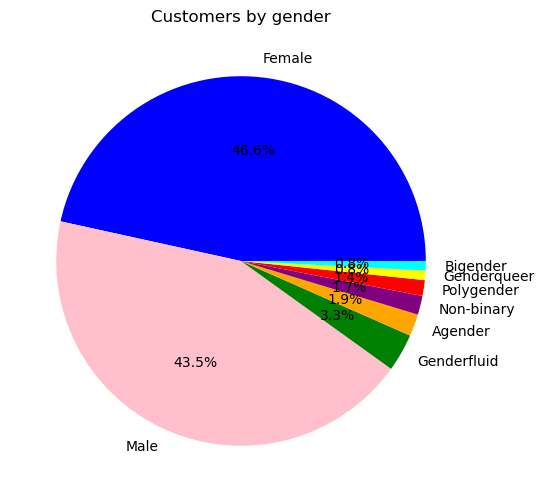

In [126]:
#CHARTS 1:
customers = customers.dropna()
items = items.dropna()
orders = orders.dropna()
order_item = order_item.dropna()

gender_counts = customers["gender"].value_counts()
colors = ['blue', 'pink', 'green', 'orange', 'purple', 'red', 'yellow', 'cyan']
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Customers by gender")
plt.show()


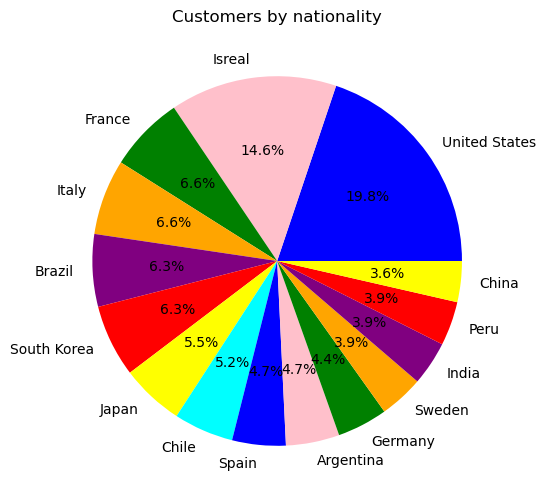

In [130]:
2:
nation_counts = customers["nationallity"].value_counts()
colors = ['blue', 'pink', 'green', 'orange', 'purple', 'red', 'yellow', 'cyan']
plt.figure(figsize=(6, 6))
plt.pie(nation_counts, labels=nation_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Customers by nationality")
plt.show()

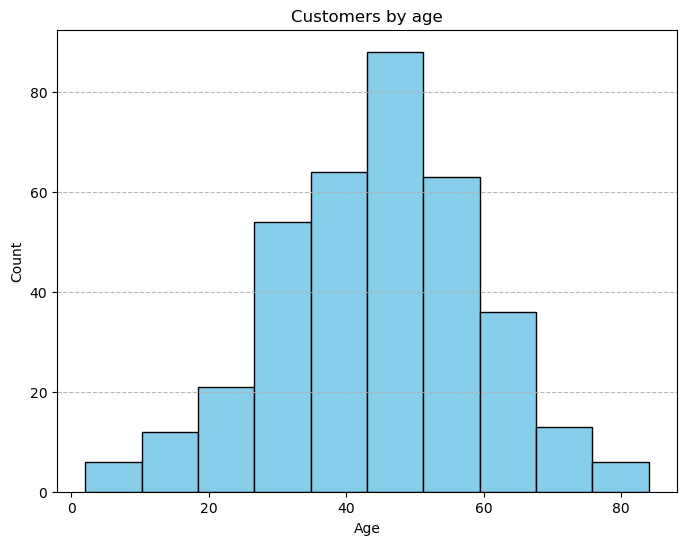

In [136]:
#3:
plt.figure(figsize=(8, 6))
plt.hist(customers["age"], bins=10, edgecolor='black', color='skyblue')  # Adjust bins for better visualization
plt.title("Customers by age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

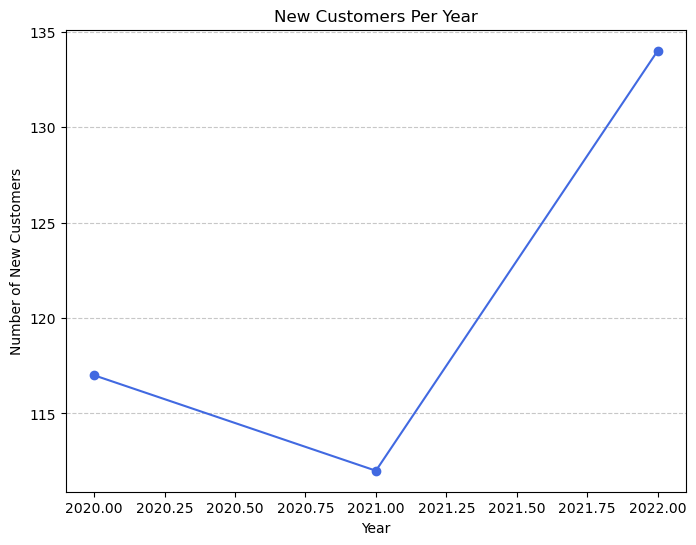

In [138]:
#4:
customers["joining_date"] = pd.to_datetime(customers["joining_date"], dayfirst=True)
customers["signup_year"] = customers["joining_date"].dt.year
new_customers_per_year = customers["signup_year"].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.plot(new_customers_per_year.index, new_customers_per_year.values, marker='o', linestyle='-', color='royalblue')
plt.title("New Customers Per Year")
plt.xlabel("Year")
plt.ylabel("Number of New Customers")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

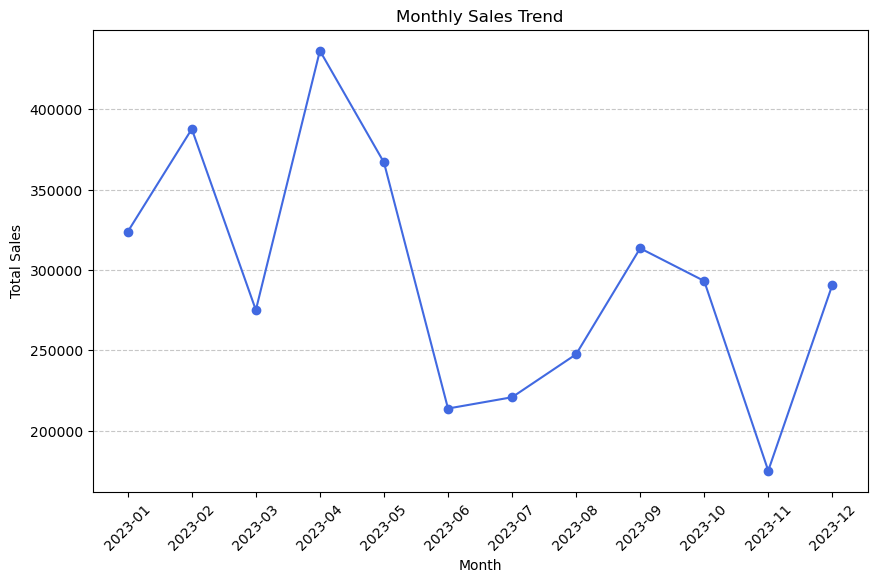

In [182]:
#5:
orders["order_date"] = pd.to_datetime(orders["order_date"])
merged = pd.merge(order_item, items, left_on="item_id", right_on="id")
merged["total_price"] = merged["item_price"] * merged["quantity"]
order_totals = merged.groupby("order_id")["total_price"].sum().reset_index()
order_totals = order_totals.rename(columns={"total_price": "order_total"})
orders = pd.merge(orders, order_totals, on="order_id", how="left")
if "total_price_x" in orders.columns or "total_price_y" in orders.columns:
    orders = orders.drop(columns=["total_price_x", "total_price_y"], errors="ignore")
orders["month_year"] = orders["order_date"].dt.to_period("M")
monthly_sales = orders.groupby("month_year")["order_total"].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color='royalblue')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


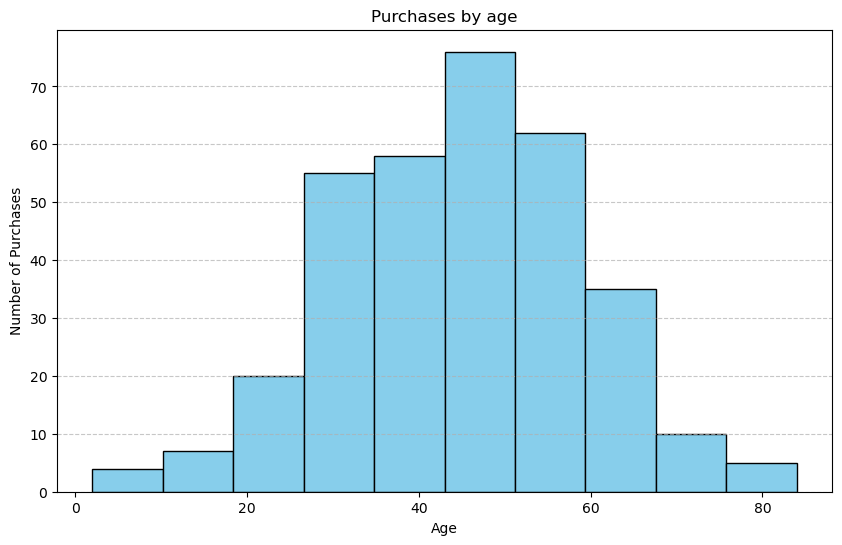

In [166]:
#6: from what i can see the correlation is that middle age customers tend to purchase more than their younger or older counterparts.
merged = pd.merge(orders, customers, left_on="customer_id", right_on="id")
age_counts = merged["age"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.hist(merged["age"], bins=10, edgecolor="black", color="skyblue") 
plt.title("Purchases by age")
plt.xlabel("Age")
plt.ylabel("Number of Purchases")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()